In [13]:
## 모형 불러오기
import trimesh
import numpy as np
# 
# model = trimesh.load('./obj/model.stl')
# ## 표면 위의 점 추출
# ### sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
# samples = trimesh.sample.sample_surface_even(model, 250)
# points = samples[0]

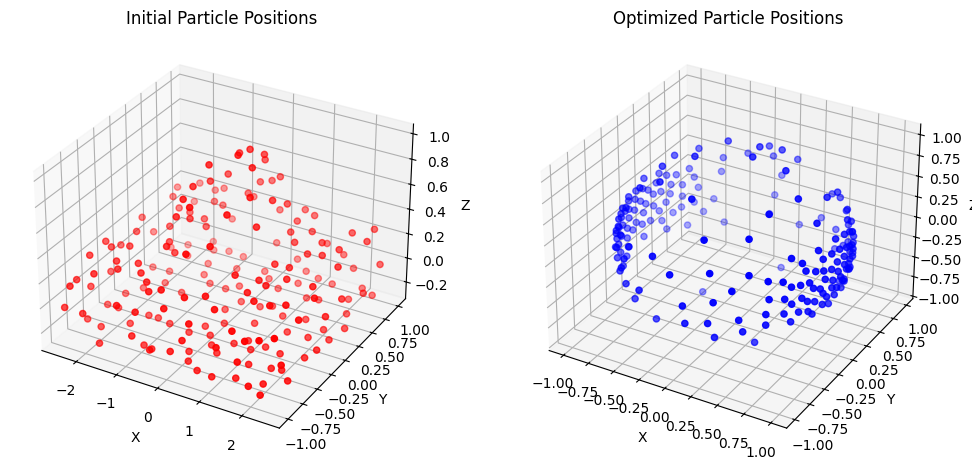

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 파티클을 구 표면 위에 랜덤하게 초기화
def initialize_particles(num_particles, radius=1.0):
    model = trimesh.load('./obj/model.stl')
    samples = trimesh.sample.sample_surface_even(model, num_particles)
    particles = samples[0]
    return particles * radius

# 가우시안 커널을 사용해 파티클 간의 반발력 계산
def compute_repulsive_forces(particles, sigma=0.1):
    num_particles = len(particles)
    forces = np.zeros_like(particles)
    
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            diff = particles[i] - particles[j]
            distance = np.linalg.norm(diff)
            if distance > 0:
                force = np.exp(-distance**2 / (2 * sigma**2)) * (diff / distance)
                forces[i] += force
                forces[j] -= force  # 반대 방향의 힘
    
    return forces

# 이동 벡터를 접평면으로 투영하여 표면을 따라 이동시키기
def project_to_surface(particles, forces, step_size=0.01, radius=1.0):
    new_particles = particles + forces * step_size
    new_particles /= np.linalg.norm(new_particles, axis=1)[:, None]  # 구 표면으로 재투영
    return new_particles * radius

# 파티클을 최적화하는 루프
def optimize_particles(num_particles, num_iterations, step_size=0.01, sigma=0.1, radius=1.0):
    particles = initialize_particles(num_particles, radius)
    initial_particles = particles.copy()
    
    for _ in range(num_iterations):
        forces = compute_repulsive_forces(particles, sigma)
        particles = project_to_surface(particles, forces, step_size, radius)
    
    return initial_particles, particles

# 최적화 실행
initial_particles, final_particles = optimize_particles(num_particles=200, num_iterations=10)

# 3D 그래프 그리기
fig = plt.figure(figsize=(12, 6))

# 초기 파티클 위치
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(initial_particles[:, 0], initial_particles[:, 1], initial_particles[:, 2], c='r', marker='o')
ax1.set_title("Initial Particle Positions")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# 최적화된 파티클 위치
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(final_particles[:, 0], final_particles[:, 1], final_particles[:, 2], c='b', marker='o')
ax2.set_title("Optimized Particle Positions")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()
